## Import Modules

In [1]:
import numpy as np                     # array goodnes
from pandas import DataFrame, read_csv # excel for python
from matplotlib import pyplot as plt   # plotting library
from pandas import DataFrame, read_csv # excel for python
from keras.utils import get_file       # handy function to download data

%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')       # nice colors
plt.xkcd()
plt.rc('font',family='DejaVu Sans')
plt.rcParams['figure.figsize'] = (12, 8)


def plot_decision_surface(CLF, df, labels, axes, plot_step=1e-1):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(labels.reshape(-1))
    fig, axs = plt.subplots(len(axes), len(axes), figsize=(12, 12))
    for idx in range(len(axes)):
        for idy in range(len(axes)):
            ax = axs[idy][idx]
            if idx == 0: ax.set_ylabel(axes[idy])
            if idy == len(axes)-1: ax.set_xlabel(axes[idx])
            if idx == idy: continue
            x_label, y_label = axes[idx], axes[idy]
            x, y = df[x_label], df[y_label]
            _clf = CLF()
            _clf.fit(np.column_stack([x, y]), labels)
            xx, yy = np.meshgrid(np.arange(np.min(x)-1, np.max(x)+1, plot_step),
                                 np.arange(np.min(y)-1, np.max(y)+1, plot_step))
            Z = _clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = le.transform(Z)
            Z = Z.reshape(xx.shape)
            cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
            l = labels.reshape(-1)
            for label in le.classes_:
                ax.scatter(x[l==label], y[l==label], label=label, 
                           cmap=plt.cm.RdYlBu, edgecolors='black')
    fig.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Using TensorFlow backend.


![Iris dataset](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

In [2]:
fn_iris = get_file('iris.csv', 'https://raw.githubusercontent.com/liob/ai-winther-school/master/data/iris.csv')

df_iris = read_csv(fn_iris)
X_iris = df_iris.drop(['species'], axis=1)
Y_iris = df_iris['species'].reshape((-1, 1))

X_iris.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Training a Decision Tree

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, 
                                                    test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.98

# Plot Decision Surfaces

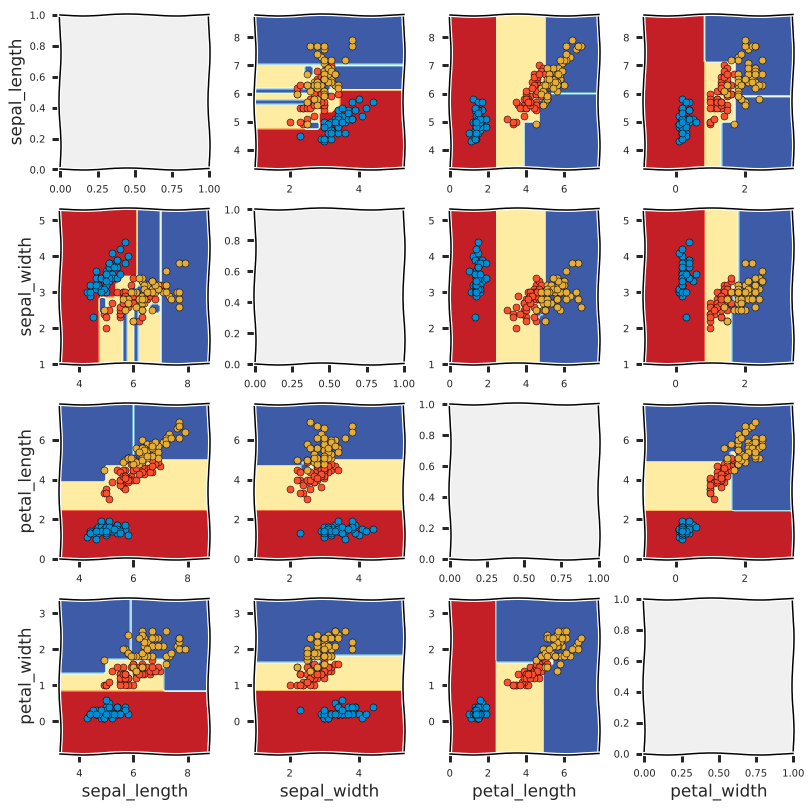

In [4]:
plot_decision_surface(DecisionTreeClassifier, X_iris, Y_iris, ['sepal_length', 'sepal_width', 
                                                               'petal_length', 'petal_width', 
                                                               ])

# Feature Importances

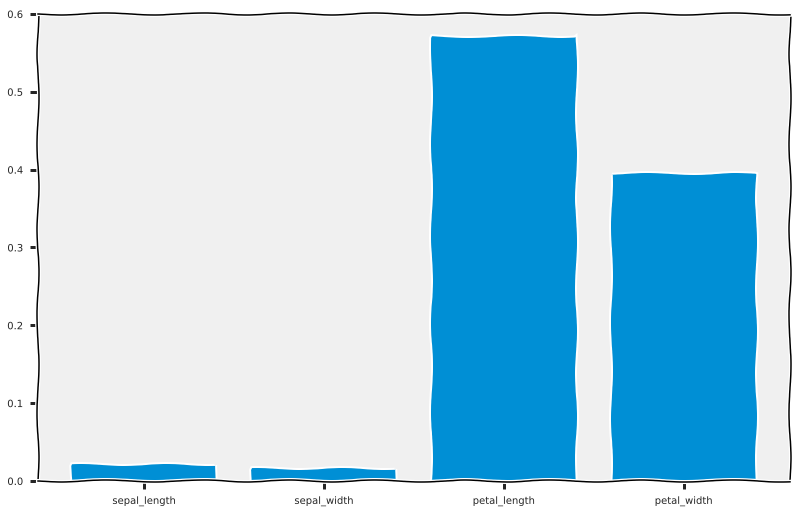

In [5]:
def plot_importance(clf, df):
    plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
    plt.xticks(range(len(clf.feature_importances_)), df.columns)
    
plot_importance(clf, X_train)

# HANDS ON: Training a Random Forest Classifier
![Bundestag](https://www.bundestag.de/image/462008/16x9/598/336/e4f4245308d9f907d264e173cc388a9/uW/plenum_teaser_sitzungsverlauf_bild.jpg)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

fn_titanic = get_file('titanic.csv', 'https://raw.githubusercontent.com/liob/ai-winther-school/master/data/titanic.csv')
# read the data set
df_titanic = read_csv(fn_titanic)

# handle nan entries. 
df_titanic = df_titanic.fillna(0)

# convert string data to numbers
for idx in ['Sex', 'Name', 'Ticket', 'Cabin', 'Embarked']:
    df_titanic[idx] = le.fit_transform(df_titanic[idx].astype(str))


65536/61194 [================================] - 0s 0us/step


# HANDS ON BONUS: Try Different Hyper Parameters and Classifiers

try to use different hyper parameters for the random forest classifier. You will find a documenation of viable hyperparameters here:  [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Also try [different types of ensemble classifiers](http://scikit-learn.org/stable/modules/ensemble.html), such as the ExtraTreesClassifier model.

In [25]:
# create feature vector
X_titanic = df_titanic.drop(['Survived'], axis=1)
Y_titanic = df_titanic['Survived']

# perform test / train split
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic, Y_titanic, 
                                                    test_size=0.33, random_state=42)

# create the classifier
clf = RandomForestClassifier(n_estimators=2)

# train the classifier
clf.fit(X_train, Y_train)

# evalutate the classifier
clf.score(X_test, Y_test)

0.7491525423728813